In [0]:
pip install tensorflow-gpu

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import keras
import os
from scipy.io import loadmat

Using TensorFlow backend.


In [0]:

train_images = loadmat('/content/drive/My Drive/RNN/Train/train_images_with_debris_50.mat')
validate_images = loadmat('/content/drive/My Drive/RNN/validate/validate_images_with_debris_50.mat')
test_images = loadmat('/content/drive/My Drive/RNN/Test/test_images_with_debris_50.mat')


train_imgs = train_images['images']/255.0
validate_imgs = validate_images['images']/255.0
train_lbls = train_images['targets']
validate_lbls = validate_images['targets']
test_imgs = test_images['images']/255.0
test_lbls = test_images['targets']


num_classes = 10
validate_lbls = np.squeeze(keras.utils.to_categorical(validate_lbls, num_classes))
train_lbls = np.squeeze(keras.utils.to_categorical(train_lbls, num_classes))
test_lbls = np.squeeze(keras.utils.to_categorical(test_lbls, num_classes))

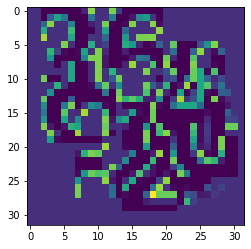

In [0]:
img = (train_imgs[99].squeeze())
plt.imshow(img)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape= (32,32,1)),
    tf.keras.layers.Conv2D(64,3, strides = (1, 1), padding='same', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.0005), activation = 'relu'),
    tf.keras.layers.MaxPool2D((2, 2),(2, 2)),
    tf.keras.layers.Conv2D(64, 3, strides = (1, 1), padding='same', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.0005), activation = 'relu'),
    tf.keras.layers.GlobalMaxPooling2D(data_format='channels_last'),
    tf.keras.layers.Dense(10, activation = 'sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0005))
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 38,218
Trainable params: 38,218
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import callbacks

def step_decay(epoch):
  initial_lr=0.001
  decay_rate = 0.1
  decay_step = 35
  lrate = initial_lr * decay_rate ** (epoch/decay_step)
  print("learning_rate")
  print(lrate)
  return lrate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [0]:
history = model.fit(train_imgs, train_lbls, batch_size=100, epochs=100, validation_data=(validate_imgs, validate_lbls), callbacks = callbacks_list)

Train on 100000 samples, validate on 10000 samples
learning_rate
1e-05
Epoch 1/100
100000/100000 [==============================] - 13s 134us/sample - loss: 2.3436 - accuracy: 0.0990 - val_loss: 2.3416 - val_accuracy: 0.1002
learning_rate
9.440608762859235e-06
Epoch 2/100
100000/100000 [==============================] - 6s 63us/sample - loss: 2.3399 - accuracy: 0.0992 - val_loss: 2.3388 - val_accuracy: 0.0990
learning_rate
8.912509381337456e-06
Epoch 3/100
100000/100000 [==============================] - 6s 63us/sample - loss: 2.3375 - accuracy: 0.0997 - val_loss: 2.3367 - val_accuracy: 0.0971
learning_rate
8.413951416451952e-06
Epoch 4/100
100000/100000 [==============================] - 6s 63us/sample - loss: 2.3355 - accuracy: 0.1025 - val_loss: 2.3349 - val_accuracy: 0.0980
learning_rate
7.943282347242815e-06
Epoch 5/100
100000/100000 [==============================] - 6s 64us/sample - loss: 2.3338 - accuracy: 0.1025 - val_loss: 2.3334 - val_accuracy: 0.0964
learning_rate
7.4989420

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [0]:
[test_loss, test_accuracy] = model.evaluate(test_imgs, test_lbls)
metrics = {'train_accuracy': history.history['accuracy'], 'validation_accuracy': history.history['val_accuracy'], 'validation_loss': history.history['val_loss' ], 'test_loss': test_loss, 'test_acc': test_accuracy}

In [0]:
import json
with open("metrics.json", "w") as fp:
  json.dump(str(metrics), fp)